In [1]:
import scanpy as sc

In [146]:
adata9 = sc.read('/goofys/stereoseq_dataset/Mouse_embryo_E9.5_E1S1_Cnt.MOSTA.h5ad')
adata10 = sc.read('/goofys/MOSTA/E9.5/E9.5_E2S2.MOSTA.h5ad')
# adata11 = sc.read('/goofys/MOSTA/E11.5/E11.5_E1S2.MOSTA.h5ad')

Only considering the two last: ['.MOSTA', '.h5ad'].
Only considering the two last: ['.MOSTA', '.h5ad'].
Only considering the two last: ['.MOSTA', '.h5ad'].
Only considering the two last: ['.MOSTA', '.h5ad'].


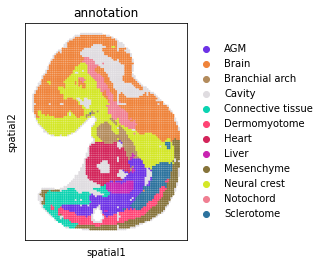

In [147]:
sc.pl.spatial(adata9, color=['annotation'], spot_size=1.2)

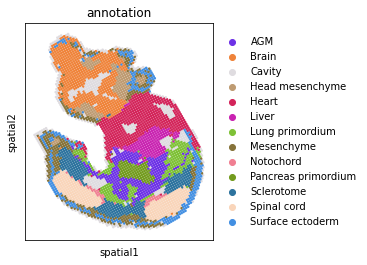

In [148]:
sc.pl.spatial(adata10, color=['annotation'], spot_size=1.2)

In [149]:
sc.pp.filter_cells(adata9, 200)
sc.pp.filter_genes(adata9, 3)
sc.pp.filter_cells(adata10, 200)
sc.pp.filter_genes(adata10, 3)

In [150]:
# sc.pp.normalize_total(adata9, target_sum=1e4)
sc.pp.normalize_total(adata9, target_sum=1e4)
sc.pp.normalize_total(adata10, target_sum=1e4)

In [151]:
# sc.pp.log1p(adata9)
sc.pp.log1p(adata9)
sc.pp.log1p(adata10)

In [155]:
sc.tl.rank_genes_groups(adata9, groupby='annotation', method='t-test', pts=True)
sc.tl.rank_genes_groups(adata10, groupby='annotation', method='t-test', pts=True) #t-test
# sc.tl.rank_genes_groups(adata11, groupby='annotation', method='t-test', pts=True)

In [63]:
adata10.uns['rank_genes_groups']['names'].dtype.names

('AGM',
 'Brain',
 'Cavity',
 'Connective tissue',
 'Head mesenchyme',
 'Heart',
 'Liver',
 'Lung primordium',
 'Mesenchyme',
 'Spinal cord',
 'Surface ectoderm')

In [68]:
# adata9_dict = {name: set(sc.get.rank_genes_groups_df(adata9, name, pval_cutoff=0.05).loc[:,'names'].values[:100]) \
#              for name in adata9.uns['rank_genes_groups']['names'].dtype.names}
# adata10_dict = {name: set(sc.get.rank_genes_groups_df(adata10, name, pval_cutoff=0.05).loc[:,'names']) \
#              for name in adata10.uns['rank_genes_groups']['names'].dtype.names}
# adata11_dict = {name: set(sc.get.rank_genes_groups_df(adata11, name, pval_cutoff=0.05).loc[:,'names']) \
#              for name in adata11.uns['rank_genes_groups']['names'].dtype.names} 

In [88]:
a = sc.get.rank_genes_groups_df(adata10, 'AGM', pval_cutoff=0.05).loc[:,'names'].values
a

array(['Asxl3', 'Hba-a2', 'Hba-a1', ..., 'Gm14085', 'Tmsb10', 'Gtsf2'],
      dtype=object)

In [120]:
# df_pts = adata10.uns['rank_genes_groups']['pts'].loc[a, 'AGM']
# df_pts
# df_pts_rest = adata10.uns['rank_genes_groups']['pts_rest'].loc[a, 'AGM']
# df_res = df_pts.divide(df_pts_rest)


In [153]:
def filter_marker_genes_fold_change_in_out(adata, fold_change=3):
    clusters_to_mg = {name: sc.get.rank_genes_groups_df(adata, name, pval_cutoff=0.05).loc[:,'names'] \
             for name in adata.uns['rank_genes_groups']['names'].dtype.names}

    clusters_to_mg_pts_fold_change = {k: adata.uns['rank_genes_groups']['pts'].loc[v,k].divide(adata.uns['rank_genes_groups']['pts_rest'].loc[v,k]) 
                                       for k, v in clusters_to_mg.items()}
    clusters_to_mg_pts_fold_change = {}
    for k, v in clusters_to_mg.items():
        pts_in_out = adata.uns['rank_genes_groups']['pts'].loc[v,k].divide(adata.uns['rank_genes_groups']['pts_rest'].loc[v,k])
        pts_in_out = pts_in_out[pts_in_out > fold_change]
        clusters_to_mg_pts_fold_change[k] = set(pts_in_out.index)

    return clusters_to_mg_pts_fold_change


In [132]:
def create_data_dict(dict1, dict2):
    return {k1: {k2: len(v1.intersection(v2)) for k2, v2 in dict2.items()} for k1, v1 in dict1.items()}

In [156]:
adata9_dict = filter_marker_genes_fold_change_in_out(adata9)
adata10_dict = filter_marker_genes_fold_change_in_out(adata10)

In [141]:
for k, v in adata11_dict.items():
    print(k, len(v))

Blood vessel 55
Brain 878
Branchial arch 86
Cartilage primordium 100
Cavity 67
Choroid plexus 35
Dermomyotome 394
Dorsal root ganglion 662
GI tract 248
Head mesenchyme 117
Heart 470
Jaw and tooth 80
Liver 924
Mesenchyme 54
Pancreas primordium 117
Sclerotome 86
Surface ectoderm 112
Urogenital ridge 204


In [157]:
import pandas as pd 
df = pd.DataFrame(create_data_dict(adata9_dict, adata10_dict))
df


,AGM,Brain,Branchial arch,Cavity,Connective tissue,Dermomyotome,Heart,Liver,Mesenchyme,Neural crest,Notochord,Sclerotome
AGM,17,0,6,0,9,0,4,3,0,3,0,1
Brain,1,89,2,0,1,0,0,0,0,0,10,0
Cavity,0,0,0,0,0,0,0,0,0,0,0,0
Head mesenchyme,0,0,4,0,0,1,0,0,1,11,1,0
Heart,2,0,4,0,1,4,165,2,0,0,2,0
Liver,6,1,3,0,5,1,35,61,0,2,6,1
Lung primordium,5,0,1,0,0,2,0,1,0,0,0,2
Mesenchyme,0,0,1,0,2,1,0,0,1,0,0,0
Notochord,1,1,0,0,1,1,0,3,0,0,19,0
Pancreas primordium,11,6,23,0,7,2,17,118,1,0,14,2
